# Global warming e PCA

Grafico di correlazione: emissioni di CO<sub>2</sub> vs anomalia della temperatura globale.

Sorgenti: https://datahub.io/collections/climate-change
* Global temperature anomalies: https://datahub.io/core/global-temp
* CO2 emissions: https://datahub.io/core/co2-fossil-global
* CO2 ppm: https://datahub.io/core/co2-ppm

In [1]:
import pandas as pd
import wget

In [2]:
wget.download('https://datahub.io/core/co2-fossil-global/r/global.csv', 'data/co2_emissions.csv')

'data/co2_emissions.csv'

In [3]:
wget.download('https://datahub.io/core/global-temp/r/annual.csv', 'data/temperature_anomaly.csv')

'data/temperature_anomaly.csv'

In [4]:
co2 = pd.read_csv('data/co2_emissions.csv')

In [5]:
temp = pd.read_csv('data/temperature_anomaly.csv')

In [6]:
temp

,Source,Year,Mean
0,GCAG,2016,0.9363
1,GISTEMP,2016,0.9900
2,GCAG,2015,0.8998
3,GISTEMP,2015,0.8700
4,GCAG,2014,0.7408
...,...,...,...
269,GISTEMP,1882,-0.1000
270,GCAG,1881,-0.0628
271,GISTEMP,1881,-0.1200
272,GCAG,1880,-0.1148


In [7]:
co2 = co2[co2.Year >=1880]
temp = temp[temp.Year<=2010]

In [8]:
df = temp.merge(co2, how = 'left', on = ['Year'])

In [9]:
df

,Source,Year,Mean,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,GCAG,2010,0.7014,9167,1702,3114,3842,450,59,1.33
1,GISTEMP,2010,0.7100,9167,1702,3114,3842,450,59,1.33
2,GCAG,2009,0.6367,8740,1585,3056,3620,413,66,1.28
3,GISTEMP,2009,0.6400,8740,1585,3056,3620,413,66,1.28
4,GCAG,2008,0.5419,8783,1631,3122,3571,388,71,1.30
...,...,...,...,...,...,...,...,...,...,...
257,GISTEMP,1882,-0.1000,256,0,4,252,0,0,NaN
258,GCAG,1881,-0.0628,243,0,4,239,0,0,NaN
259,GISTEMP,1881,-0.1200,243,0,4,239,0,0,NaN
260,GCAG,1880,-0.1148,236,0,3,233,0,0,NaN


Text(0, 0.5, 'Global temperature anomaly [°C]')

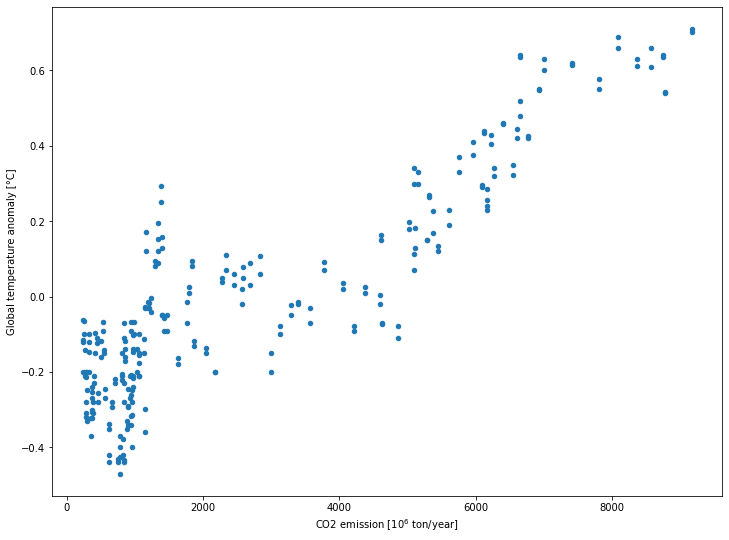

In [10]:
import matplotlib.pyplot as plt
ax = df.plot('Total', 'Mean', kind='scatter', style='o', figsize=(12,9))
ax.set_xlabel('CO2 emission [$10^6$ ton/year]')
ax.set_ylabel('Global temperature anomaly [°C]')

In [11]:
print("correlation: ",df.Total.corr(df.Mean))

correlation:  0.8918988671763471


# Principal Component Analysis

Ad un insieme di variabili $x_1, \cdots, x_n$ viene applicata una trasformazione lineare che diagonalizza la matrice di covarianza. I passi sono i seguenti:

* Viene sottratto il valor medio a ciascuna variabile
* Viene calcolata la matrice di covarianza delle varie $y_i$
* Viene diagonalizzata la matrice di covarianza
* Vengono proiettate le variabili sugli autovettori e ordinate per varianza

In caso di problema a molte variabili, si può ridurre il numero di varabili a quelle più significative, ossia quelle che hanno la *componente principlale* maggiore.

####  Implementazione in python:
* [```sklearn.decomposition.PCA```](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

Ricordiamo che abbiamo già visto l'implementazione della ricerca di autovalori ed autovettori in ```numpy```, [```numpy.linalg.eig```](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html).

In [12]:
from sklearn.decomposition import PCA
import numpy as np

In [13]:
data = np.column_stack((df['Total'], df['Mean']))

In [14]:
pca = PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In [15]:
transf = pca.fit_transform(data)

Grafichiamo le coordinate trasformate.

<span style="color:red">**Nota:** avendo sottratto il valor medio, alcune variabili perdono di senso fisico, come l'emissione di CO<sub>2</sub>, che è necessariamente positiva.</span>

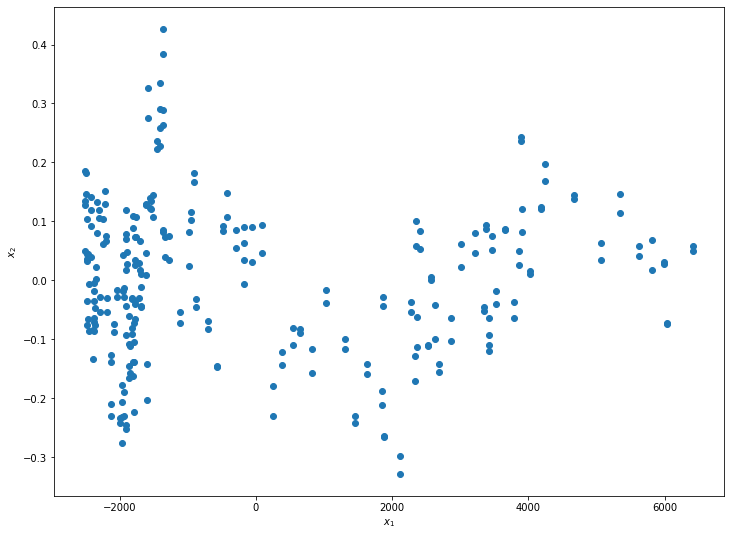

In [16]:
plt.figure(figsize=(12,9))
plt.scatter(transf[:,0], transf[:,1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

Applichiamo una *riduzione di dimensionalità*:

In [17]:
transf[:,1]=0
inv_pca = pca.inverse_transform(transf)

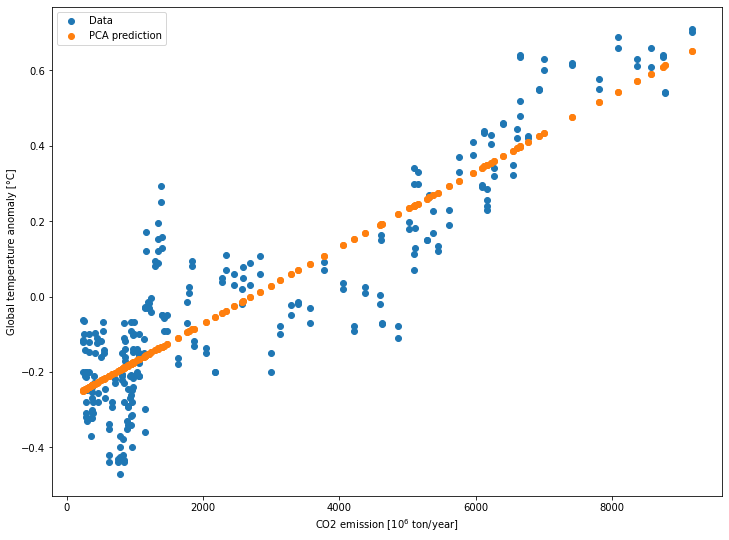

In [18]:
plt.figure(figsize=(12,9))
plt.scatter(data[:,0], data[:,1], label='Data')
plt.scatter(inv_pca[:,0], inv_pca[:,1], label='PCA prediction')
plt.xlabel('CO2 emission [$10^6$ ton/year]')
plt.ylabel('Global temperature anomaly [°C]')
plt.legend()
plt.show()